In [1]:
import pandas as  pd
import math
import folium
import json
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np

In [2]:
#한글 안깨지는 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")


In [3]:
traffic=pd.read_excel("data/2017_201905교통량.xlsx", encoding="utf-8")

In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243752 entries, 0 to 243751
Data columns (total 30 columns):
일자      243752 non-null int64
요일      243752 non-null object
지점명     243752 non-null object
지점번호    243752 non-null object
구분      243752 non-null object
방향      243446 non-null object
0시      204044 non-null float64
1시      204305 non-null float64
2시      204206 non-null float64
3시      204339 non-null float64
4시      204776 non-null float64
5시      205042 non-null float64
6시      205029 non-null object
7시      204952 non-null float64
8시      204822 non-null float64
9시      204775 non-null float64
10시     204659 non-null float64
11시     204569 non-null float64
12시     204776 non-null float64
13시     204752 non-null float64
14시     204918 non-null float64
15시     205190 non-null float64
16시     205244 non-null float64
17시     205408 non-null float64
18시     205691 non-null float64
19시     205614 non-null float64
20시     205783 non-null float64
21시     205775 non-null float64
2

In [5]:
traffic.columns

Index(['일자', '요일', '지점명', '지점번호', '구분', '방향', '0시', '1시', '2시', '3시', '4시',
       '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시',
       '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'],
      dtype='object')

In [6]:
traffic=traffic[['일자', '요일', '지점명', '지점번호', '구분', '방향','8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시',
       '16시', '17시', '18시', '19시', '20시']]

In [7]:
traffic.head()

,일자,요일,지점명,지점번호,구분,방향,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시
0,20170101,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,1022.0,1206.0,1506.0,1441.0,1555.0,1572.0,1396.0,1560.0,1613.0,1488.0,1339.0,1036.0,966.0
1,20170102,월,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2447.0,1985.0,1829.0,1656.0,1566.0,1666.0,1620.0,1840.0,1742.0,1932.0,1913.0,1474.0,1289.0
2,20170103,화,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2468.0,2188.0,1973.0,1931.0,1866.0,1936.0,1883.0,2028.0,2092.0,2048.0,2105.0,1764.0,1389.0
3,20170104,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2558.0,2162.0,1951.0,1931.0,1848.0,1917.0,1915.0,1946.0,2062.0,2129.0,2106.0,1699.0,1387.0
4,20170105,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2626.0,2254.0,1916.0,2089.0,1815.0,1871.0,1778.0,2010.0,1966.0,2221.0,2198.0,1726.0,1362.0


In [8]:
traffic['total']=traffic['8시']+traffic['9시']+traffic['10시']+traffic['11시']+traffic['12시']+traffic['13시']+traffic['14시']+traffic['15시']+traffic['16시']+traffic['17시']+traffic['18시']+traffic['19시']+traffic['20시']

In [9]:
traffic.head()

,일자,요일,지점명,지점번호,구분,방향,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,total
0,20170101,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,1022.0,1206.0,1506.0,1441.0,1555.0,1572.0,1396.0,1560.0,1613.0,1488.0,1339.0,1036.0,966.0,17700.0
1,20170102,월,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2447.0,1985.0,1829.0,1656.0,1566.0,1666.0,1620.0,1840.0,1742.0,1932.0,1913.0,1474.0,1289.0,22959.0
2,20170103,화,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2468.0,2188.0,1973.0,1931.0,1866.0,1936.0,1883.0,2028.0,2092.0,2048.0,2105.0,1764.0,1389.0,25671.0
3,20170104,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2558.0,2162.0,1951.0,1931.0,1848.0,1917.0,1915.0,1946.0,2062.0,2129.0,2106.0,1699.0,1387.0,25611.0
4,20170105,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,2626.0,2254.0,1916.0,2089.0,1815.0,1871.0,1778.0,2010.0,1966.0,2221.0,2198.0,1726.0,1362.0,25832.0


In [10]:
traffic['Latitude']=0
traffic['Longitude']=0

In [11]:
traffic.shape

(243752, 22)

In [12]:
traffic.isnull().sum()

일자               0
요일               0
지점명              0
지점번호             0
구분               0
방향             306
8시           38930
9시           38977
10시          39093
11시          39183
12시          38976
13시          39000
14시          38834
15시          38562
16시          38508
17시          38344
18시          38061
19시          38138
20시          37969
total        43380
Latitude         0
Longitude        0
dtype: int64

In [25]:
merge_data=pd.merge(traffic, spot, left_on='지점번호', right_on='spot_num', how="outer")
merge_data.head()
merge_data.columns


Index(['일자', '요일', '지점명', '지점번호', '구분', '방향', '8시', '9시', '10시', '11시', '12시',
       '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', 'total',
       'Latitude_x', 'Longitude_x', 'spot_num', 'spot_nm', 'Latitude_y',
       'Longitude_y'],
      dtype='object')

In [26]:
merge_data=merge_data[['일자', '요일', '지점명', '지점번호', '구분', '방향', '8시', '9시', '10시', '11시', '12시',
       '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', 'total','Latitude_y', 'Longitude_y']]

In [27]:
merge_data.isnull().sum()

일자                24
요일                24
지점명               24
지점번호              24
구분                24
방향               330
8시             38954
9시             39001
10시            39117
11시            39207
12시            39000
13시            39024
14시            38858
15시            38586
16시            38532
17시            38368
18시            38085
19시            38162
20시            37993
total          43404
Latitude_y         0
Longitude_y        0
dtype: int64

In [28]:
merge_data=merge_data[merge_data.notnull()]

In [29]:
merge_data=merge_data[merge_data['지점번호'].notnull()]
merge_data.isnull().sum()

일자                 0
요일                 0
지점명                0
지점번호               0
구분                 0
방향               306
8시             38930
9시             38977
10시            39093
11시            39183
12시            38976
13시            39000
14시            38834
15시            38562
16시            38508
17시            38344
18시            38061
19시            38138
20시            37969
total          43380
Latitude_y         0
Longitude_y        0
dtype: int64

In [30]:
merge_data['방향'].fillna("유출", inplace=True)

# merve_ver1 hasn't null value

In [31]:
merge_ver1=merge_data[merge_data['total'].notnull()]

In [32]:
merge_data.isnull().sum()

일자                 0
요일                 0
지점명                0
지점번호               0
구분                 0
방향                 0
8시             38930
9시             38977
10시            39093
11시            39183
12시            38976
13시            39000
14시            38834
15시            38562
16시            38508
17시            38344
18시            38061
19시            38138
20시            37969
total          43380
Latitude_y         0
Longitude_y        0
dtype: int64

In [33]:
pd.pivot_table(merge_ver1, index="지점번호", aggfunc=np.sum)

,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,8시,9시,Latitude_y,Longitude_y,total,일자
지점번호,,,,,,,,,,,,,,,,,
A-01,2980800.0,3023996.0,2923781.0,3018632.0,2986117.0,3133606.0,3227963.0,3405160.0,3460536.0,2989111.0,2512687.0,3171102.0,3094190.0,62853.405440,212390.361400,39927681.0,3.375846e+10
A-02,2811907.0,2854807.0,2717974.0,2761827.0,2729687.0,2800091.0,2864255.0,2961891.0,2918053.0,2509365.0,2267053.0,3079111.0,2924850.0,52977.915900,179022.342000,36200871.0,2.845320e+10
A-03,1418222.0,1290698.0,1180518.0,1216828.0,1265321.0,1292515.0,1347371.0,1424868.0,1408806.0,1254371.0,1073846.0,1437153.0,1463545.0,58338.516000,197059.612800,17074062.0,3.131757e+10
A-04,524340.0,489036.0,459035.0,485120.0,494718.0,528723.0,591575.0,687930.0,702020.0,570334.0,439254.0,612551.0,607668.0,60267.846730,203561.122800,7192304.0,3.234650e+10
A-05,1356790.0,1411958.0,1406128.0,1424892.0,1439065.0,1426663.0,1417902.0,1387214.0,1315703.0,1220215.0,1125849.0,1285460.0,1321623.0,34720.695240,117336.542400,17539462.0,1.864406e+10
A-06,1716064.0,1691109.0,1681548.0,1701584.0,1697584.0,1685309.0,1668230.0,1630512.0,1569495.0,1465908.0,1461498.0,1962543.0,1832939.0,58554.469800,197867.402200,21764323.0,3.143728e+10
A-07,1404419.0,1460982.0,1465053.0,1536636.0,1511401.0,1555557.0,1548086.0,1553603.0,1540030.0,1417707.0,1273038.0,1314113.0,1368957.0,54826.871010,185300.295000,18949582.0,2.944143e+10
A-08,2033391.0,2014911.0,2087826.0,2095976.0,2063600.0,2115254.0,2098623.0,2076810.0,2014666.0,1920766.0,1917496.0,1952665.0,2002314.0,57976.219100,195992.014300,26394298.0,3.113599e+10
A-09,1273012.0,1334075.0,1333328.0,1341969.0,1358612.0,1362061.0,1370586.0,1351612.0,1336758.0,1334181.0,1303205.0,1153711.0,1196698.0,41510.430000,140361.299000,17049808.0,2.229745e+10


In [34]:
merge_ver1[merge_ver1['지점번호']=='A-01'].T

,0,1,2,3,4,5,6,7,8,9,...,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761
일자,2.01701e+07,2.01701e+07,2.01701e+07,2.01701e+07,2.01701e+07,2.01701e+07,2.01701e+07,2.01701e+07,2.01701e+07,2.01701e+07,...,2.01905e+07,2.01905e+07,2.01905e+07,2.01905e+07,2.01905e+07,2.01905e+07,2.01905e+07,2.01905e+07,2.01905e+07,2.01905e+07
요일,일,월,화,수,목,금,토,일,월,화,...,수,목,금,토,일,월,화,수,목,금
지점명,성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),...,성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널),성산로(금화터널)
지점번호,A-01,A-01,A-01,A-01,A-01,A-01,A-01,A-01,A-01,A-01,...,A-01,A-01,A-01,A-01,A-01,A-01,A-01,A-01,A-01,A-01
구분,유입,유입,유입,유입,유입,유입,유입,유입,유입,유입,...,유출,유출,유출,유출,유출,유출,유출,유출,유출,유출
방향,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,봉원고가차도->독립문역,...,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도,독립문역->봉원고가차도
8시,1022,2447,2468,2558,2626,2688,1474,1147,2635,2654,...,1873,1888,1819,1394,904,1857,1860,1899,1916,1795
9시,1206,1985,2188,2162,2254,2215,1724,1484,2194,2206,...,1886,1879,1787,1713,1063,1762,1931,1919,1850,1693
10시,1506,1829,1973,1951,1916,2089,1883,1639,1937,1995,...,1718,1661,1746,1523,1347,1691,1732,1741,1757,1571
11시,1441,1656,1931,1931,2089,1944,2079,1574,1972,1713,...,1663,1778,1670,1554,1390,1630,1683,1654,1728,1650


In [35]:
merge_ver1.isnull().sum()

일자             0
요일             0
지점명            0
지점번호           0
구분             0
방향             0
8시             0
9시             0
10시            0
11시            0
12시            0
13시            0
14시            0
15시            0
16시            0
17시            0
18시            0
19시            0
20시            0
total          0
Latitude_y     0
Longitude_y    0
dtype: int64

In [36]:

#merge_ver1.sample(3)

# -------------------------------------------------------------------

## Reshape Dataframe

In [37]:
merge_ver1.head(1)

,일자,요일,지점명,지점번호,구분,방향,8시,9시,10시,11시,...,14시,15시,16시,17시,18시,19시,20시,total,Latitude_y,Longitude_y
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,1022.0,1206.0,1506.0,1441.0,...,1396.0,1560.0,1613.0,1488.0,1339.0,1036.0,966.0,17700.0,37.56928,126.9518


In [38]:
timeS=['8시', '9시', '10시', '11시', '12시',
       '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시']

In [39]:
df= pd.DataFrame(columns=['일자', '요일', '지점명', '지점번호', '구분', '방향','total','Latitude_y', 'Longitude_y','time','floating'])

In [40]:
df.shape

(0, 11)

In [43]:
# data={"일자":[sampleData['일자'].iloc[0]],
#              "요일":[sampleData['요일'].iloc[0]],
#              "지점명":[sampleData['지점명'].iloc[0]],
#              "지점번호":[sampleData['지점번호'].iloc[0]],
#              "구분":[sampleData['구분'].iloc[0]],
#              "방향":[sampleData['방향'].iloc[0]],
#              "total":[sampleData['total'].iloc[0]],
#              "Latitude_y":[sampleData['Latitude_y'].iloc[0]],
#              "Longitude_y":[sampleData['Longitude_y'].iloc[0]],
#              "time":[timeS[0]],
#              "floating":[sampleData[timeS[t]].iloc[0]]}
# df=pd.DataFrame(data)


for i in range(int(merge_ver1.shape[0]/4)*3, merge_ver1.shape[0]):
    for t in range(len(timeS)):
        
        d={"일자":[merge_ver1['일자'].iloc[i]],
             "요일":[merge_ver1['요일'].iloc[i]],
             "지점명":[merge_ver1['지점명'].iloc[i]],
             "지점번호":[merge_ver1['지점번호'].iloc[i]],
             "구분":[merge_ver1['구분'].iloc[i]],
             "방향":[merge_ver1['방향'].iloc[i]],
             "total":[merge_ver1['total'].iloc[i]],
             "Latitude_y":[merge_ver1['Latitude_y'].iloc[i]],
             "Longitude_y":[merge_ver1['Longitude_y'].iloc[i]],
             "time":[timeS[t]],
             "floating":[merge_ver1[timeS[t]].iloc[i]]}
        
        df=pd.concat([df,pd.DataFrame(d)])
    if i % 1000 ==0 :
        fname="data/reshape4Part"+str(fileCnt)+".csv"
        df.to_csv(fname, encoding="utf-8")
        df= pd.DataFrame(columns=['일자', '요일', '지점명', '지점번호', '구분', '방향','total','Latitude_y', 'Longitude_y','time','floating'])
        fileCnt+=1
        print("=="+str(i/int(merge_ver1.shape[0]/4))+"% 진행완료== "+str(time.time()-ti)+"시간 소요")

        

KeyboardInterrupt: 

In [181]:
df

,일자,요일,지점명,지점번호,구분,방향,total,Latitude_y,Longitude_y,time,floating
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,8시,1022.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,9시,1206.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,10시,1506.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,11시,1441.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,12시,1555.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,13시,1572.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,14시,1396.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,15시,1560.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,16시,1613.0
0,20170101.0,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,17700.0,37.56928,126.9518,17시,1488.0


In [83]:
monData=merge_ver1[merge_ver1['요일']=="월"]

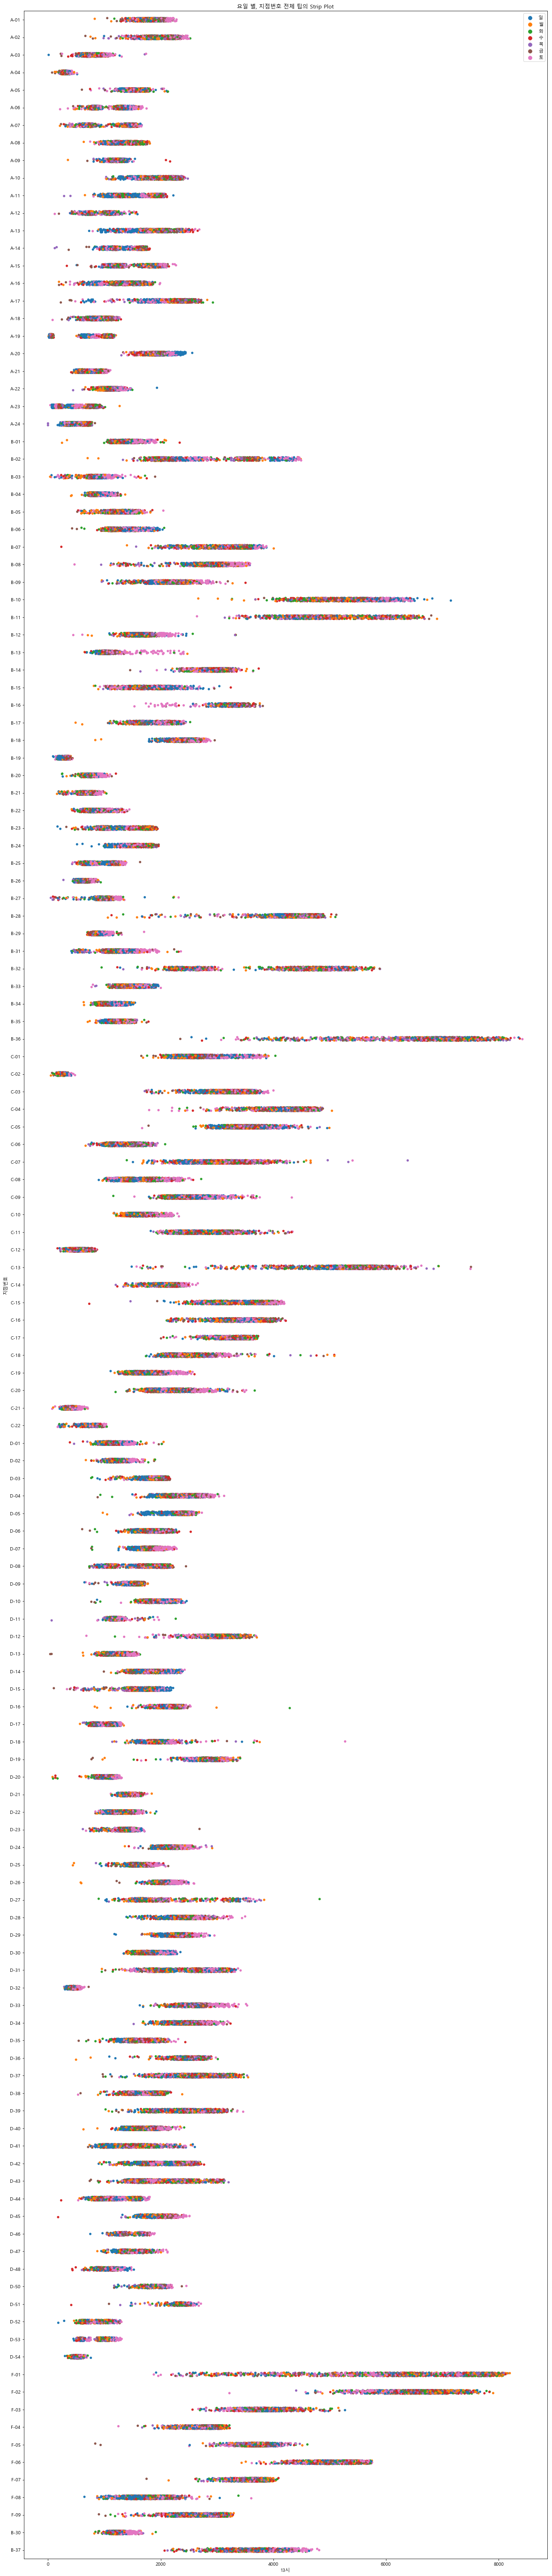

In [98]:
fig, ax = plt.subplots(1)
fig.set_size_inches(20,100)
sns.stripplot(x="13시", y="지점번호", hue="요일", data=merge_ver1, jitter=True, ax=ax)
plt.title("요일 별, 지점번호 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

In [104]:
# m = folium.Map(location=[0, 0], zoom_start=6)
# fg = folium.FeatureGroup(name='groups')
# m.add_child(fg) 
# g1 = plugins.FeatureGroupSubGroup(fg, 'group1')
# m.add_child(g1) 

# g2 = plugins.FeatureGroupSubGroup(fg, 'group2')
# m.add_child(g2) 
# folium.Marker([-1, -1]).add_to(g1)
# folium.Marker([1, 1]).add_to(g1) 
# folium.Marker([-1, 1]).add_to(g2) 
# folium.Marker([1, -1]).add_to(g2)
# folium.LayerControl(collapsed=False).add_to(m) 
# m.save(os.path.join('results', 'Plugins_8.html'))
# m


NameError: name 'plugins' is not defined

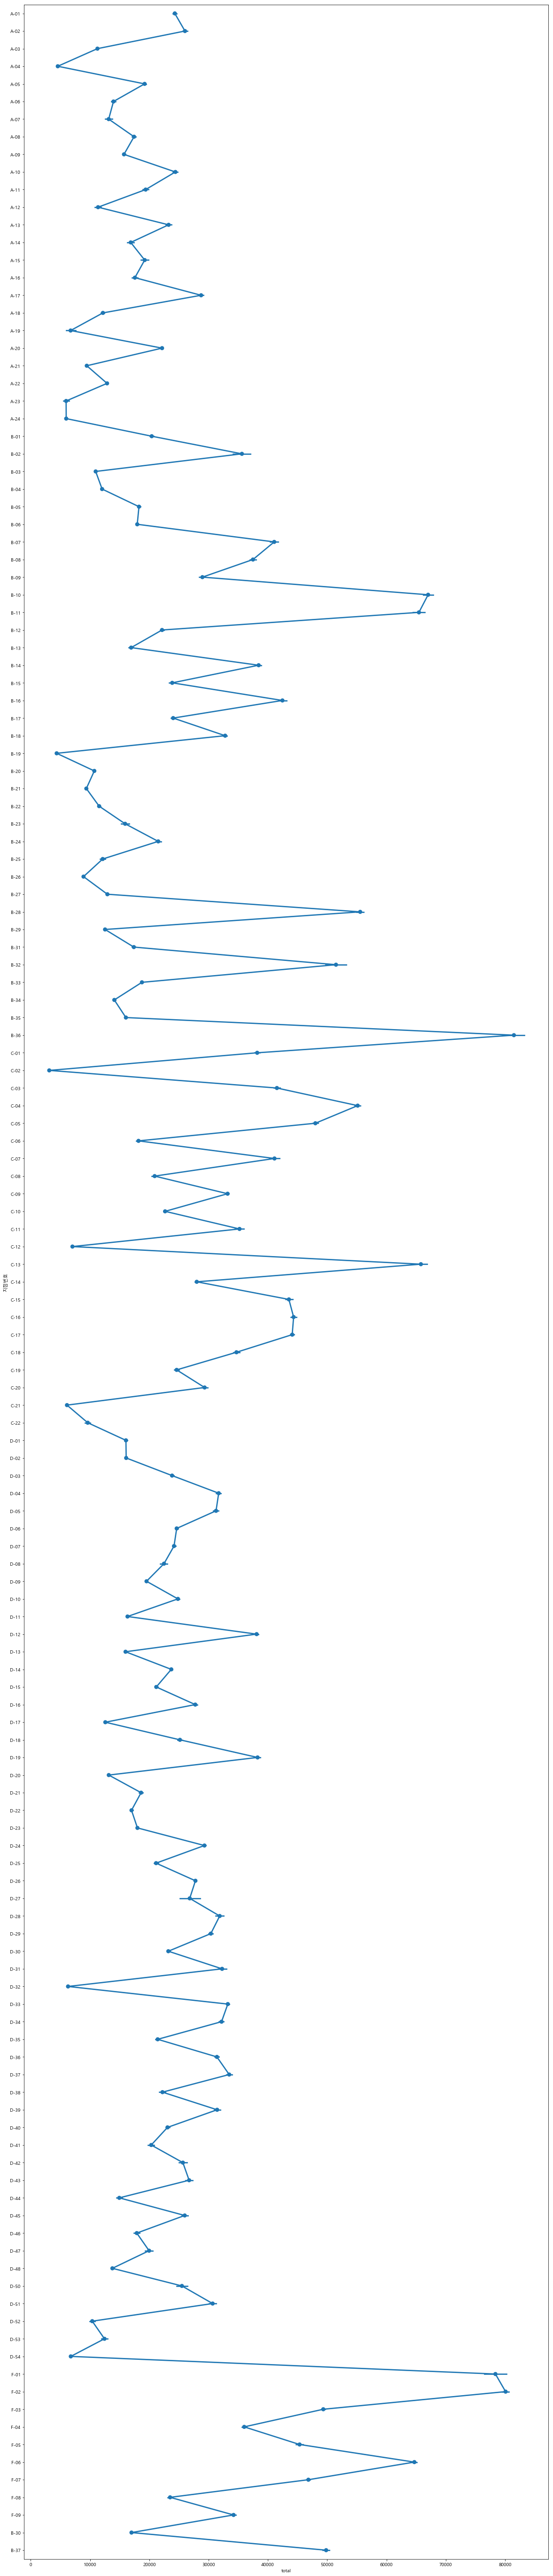

In [116]:
fig,ax=plt.subplots()
fig.set_size_inches(20,100)
sns.pointplot(data=monData, x="total", y="지점번호",ax=ax)
# sns.pointplot(data=perDay['화'], x="지점정보", y="total",ax=ax[0])
# sns.pointplot(data=perDay['수'], x="지점정보", y="total",ax=ax[0])
# sns.pointplot(data=perDay['목'], x="지점정보", y="total",ax=ax[0])
# sns.pointplot(data=perDay['금'], x="지점정보", y="total",ax=ax[0])
# sns.pointplot(data=perDay['토'], x="지점정보", y="total",ax=ax[0])
# sns.pointplot(data=perDay['일'], x="지점정보", y="total",ax=ax[0])

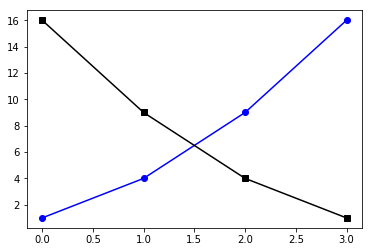

In [62]:
plt.plot([1,4,9,16],c='b',marker='o')
plt.plot([16,9,4,1],c='k',marker='s')

In [14]:
spot=pd.read_csv("data/spot_info(transLongNLat).csv", encoding="euc-kr")
spot.columns

Index(['index', 'spot_num', 'spot_nm', 'Latitude', 'Longitude', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [15]:
spot=spot[['index', 'spot_num', 'spot_nm', 'Latitude', 'Longitude']]

In [16]:
spot.drop('index', axis=1, inplace=True)
spot.head()

,spot_num,spot_nm,Latitude,Longitude
0,A-01,성산로(금화터널),37.56928,126.9518
1,A-02,사직로(사직터널),37.57299,126.9662
2,A-03,자하문로(자하문터널),37.58925,126.9714
3,A-04,대사관로(삼청터널),37.59691,126.9876
4,A-05,율곡로(안국역),37.57651,126.9876


In [17]:
spot['Latitude'].iloc[100]=37.535922
spot['Longitude'].iloc[100]=126.828191

In [18]:
spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
spot_num     169 non-null object
spot_nm      169 non-null object
Latitude     169 non-null float64
Longitude    169 non-null float64
dtypes: float64(2), object(2)
memory usage: 5.4+ KB


In [19]:
spot.isnull().sum()

spot_num     0
spot_nm      0
Latitude     0
Longitude    0
dtype: int64

In [20]:
spot.shape

(169, 4)

In [21]:
spot[spot.notnull()].shape

(169, 4)

In [22]:
ns=spot[spot['Latitude'].notnull()]

In [23]:
ns

,spot_num,spot_nm,Latitude,Longitude
0,A-01,성산로(금화터널),37.569280,126.951800
1,A-02,사직로(사직터널),37.572990,126.966200
2,A-03,자하문로(자하문터널),37.589250,126.971400
3,A-04,대사관로(삼청터널),37.596910,126.987600
4,A-05,율곡로(안국역),37.576510,126.987600
5,A-06,창경궁로(서울여자대학교),37.583100,127.000900
6,A-07,대학로(한국방송통신대학교),37.578390,127.005000
7,A-08,종로(동묘앞역),37.573700,127.020100
8,A-09,퇴계로(신당역),37.566000,127.023800
9,A-10,동호로(장충체육관),37.559150,127.010100


In [24]:
spot.isnull().sum()

spot_num     0
spot_nm      0
Latitude     0
Longitude    0
dtype: int64

In [14]:
spot.fillna(0, inplace=True)

In [15]:
spot[spot['spot_nm']=="남부순환로(화곡로입구 교차로)"]['Latitude']=37.535922
#spot.isnull().sum()

C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
spot.iloc[100]

spot_num                 D-18
spot_nm      남부순환로(화곡로입구 교차로)
Latitude              37.5359
Longitude             126.828
Name: 100, dtype: object

In [18]:
spot.isnull().sum()

spot_num     0
spot_nm      0
Latitude     0
Longitude    0
dtype: int64

In [21]:
newspot=pd.DataFrame(columns=['spot_num','spot_nm','Latitude','Longitude'])

In [22]:
findCnt=0
for i in range(spot.shape[0]):
    first=1000; fname=""; second=1000; sname=""
    x=spot.iloc[i]['Latitude']
    y=spot.iloc[i]['Longitude']
    #rint(x, " ",y)
    for j in range(spot.shape[0]):
        if i==j : continue
        fx=spot.iloc[j]['Latitude']
        fy=spot.iloc[j]['Longitude']
        dis=math.sqrt(pow((x-fx),2)+pow((y-fy),2))
        if dis<first:
            second=first; first=dis
            sname=fname; fname=spot.iloc[j]['spot_num']
            continue
        if dis<second:
            second=dis
            sname=spot.iloc[j]['spot_num']
            
    #print(float(spot[spot['spot_num']==fname]['Latitude'])+float(spot[spot['spot_num']==sname]['Latitude']))
    lat=round((float(x)+float(spot[spot['spot_num']==fname]['Latitude'])+float(spot[spot['spot_num']==sname]['Latitude']))/3,8)
    lon=round((float(y)+float(spot[spot['spot_num']==fname]['Longitude'])+float(spot[spot['spot_num']==sname]['Longitude']))/3,8)
    #print(lat)
    newspot.loc[findCnt]={'spot_num':str(findCnt), 'spot_nm':str(findCnt), 'Latitude':float(lat), 'Longitude':float(lon) }
    findCnt+=1
    print("i : ",i,"..."+str(i/spot.shape[0])+"%")

i :  0 ...0.0%
i :  1 ...0.005917159763313609%
i :  2 ...0.011834319526627219%
i :  3 ...0.01775147928994083%
i :  4 ...0.023668639053254437%
i :  5 ...0.029585798816568046%
i :  6 ...0.03550295857988166%
i :  7 ...0.04142011834319527%
i :  8 ...0.047337278106508875%
i :  9 ...0.05325443786982249%
i :  10 ...0.05917159763313609%
i :  11 ...0.0650887573964497%
i :  12 ...0.07100591715976332%
i :  13 ...0.07692307692307693%
i :  14 ...0.08284023668639054%
i :  15 ...0.08875739644970414%
i :  16 ...0.09467455621301775%
i :  17 ...0.10059171597633136%
i :  18 ...0.10650887573964497%
i :  19 ...0.11242603550295859%
i :  20 ...0.11834319526627218%
i :  21 ...0.1242603550295858%
i :  22 ...0.1301775147928994%
i :  23 ...0.13609467455621302%
i :  24 ...0.14201183431952663%
i :  25 ...0.14792899408284024%
i :  26 ...0.15384615384615385%
i :  27 ...0.15976331360946747%
i :  28 ...0.16568047337278108%
i :  29 ...0.17159763313609466%
i :  30 ...0.17751479289940827%
i :  31 ...0.1834319526627219%
i

In [23]:
spot.iloc[100]

spot_num                 D-18
spot_nm      남부순환로(화곡로입구 교차로)
Latitude              37.5359
Longitude             126.828
Name: 100, dtype: object

In [24]:
newspot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 4 columns):
spot_num     169 non-null object
spot_nm      169 non-null object
Latitude     169 non-null float64
Longitude    169 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.6+ KB


In [25]:
spot=pd.concat([newspot,spot])
spot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 168
Data columns (total 4 columns):
spot_num     338 non-null object
spot_nm      338 non-null object
Latitude     338 non-null float64
Longitude    338 non-null float64
dtypes: float64(2), object(2)
memory usage: 13.2+ KB


In [26]:
spot

,spot_num,spot_nm,Latitude,Longitude
0,0,0,37.568593,126.950733
1,1,1,37.568827,126.971900
2,2,2,37.586383,126.975067
3,3,3,37.599393,126.980433
4,4,4,37.571263,126.991267
5,5,5,37.577387,127.000067
6,6,6,37.577387,127.000067
7,7,7,37.572697,127.016300
8,8,8,37.566283,127.018000
9,9,9,37.556243,127.011300
